In [1]:
from math import pi
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### 1. 高斯分布，也叫正态分布

In [2]:
def gaussian(X, mu, sigma):
    P = (1/(sigma * np.sqrt(2 * pi))) * np.exp(-(X-mu) ** 2 / (2 * sigma ** 2))
    return P

### 2. 高斯分布的参数

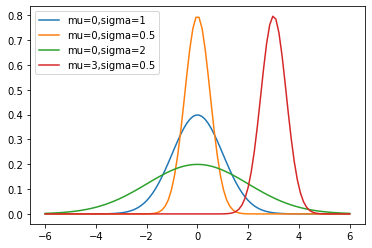

In [3]:
mus = [0, 0, 0, 3]
sigmas = [1, 0.5, 2, 0.5]

X = np.linspace(-6, 6, 100)
fig, ax = plt.subplots()
for i in range(len(mus)):
    mu, sigma = mus[i], sigmas[i]
    P = gaussian(X, mu, sigma)
    ax.plot(X, P, label='mu={},sigma={}'.format(mu, sigma))
plt.legend()

### 3.参数估计

In [4]:
def param_estimation(X):
    return X.mean(axis=0), X.std(axis = 0, ddof=0)

### 4.算法-密度估计

Text(0.5, 0.5, 'x2')

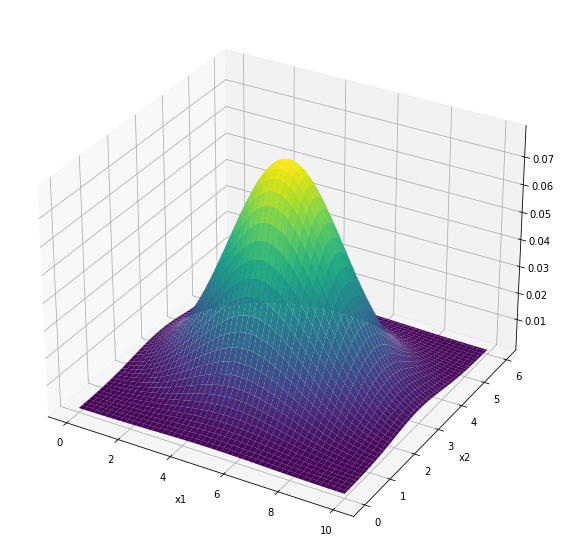

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
# surface plot
X1, u1, sigma1 = np.linspace(0, 10, 100), 5, 2
X2, u2, sigma2 = np.linspace(0, 6, 100), 3, 1
P = np.zeros((X1.shape[0], X2.shape[0]))

for i, x1 in enumerate(X1):
        for j, x2 in enumerate(X2):
            P[i, j] = gaussian(x1, u1, sigma1) * gaussian(x2, u2, sigma2)
P = P.T

X1, X2 = np.meshgrid(X1, X2)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, P, cmap='viridis')
plt.xlabel('x1')
plt.ylabel('x2')

### 5.多变量高斯分布
$$p(x;u,\Sigma) = \frac{1}{(2\pi)^{\frac{n}{2}}|\Sigma|^{\frac{1}{2}}}exp(-\frac{1}{2}(x - \mu)^{T}\Sigma^{-1}(x-\mu))$$ 
$$\mu = \frac{1}{m} \sum_{i=1}^m x^{(i)} \qquad \Sigma=\frac{1}{m} \sum_{i=1}^m (x^{(i)}-\mu) (x^{(i)}-\mu)^T$$

In [6]:
def multivariate_gaussian(X, u, Sigma):
    '''
    Parameters
    ----------
    X : array_like (m x n)
    u : array_like (n, )
    Sigma: array_like (n, n)
    '''
    n = u.size
    Sigma_det = np.linalg.det(Sigma)
    p1 = (2 * pi) ** (n / 2) * Sigma_det ** (1 / 2)
    p1 = 1 / p1
    Sigma_I =  np.linalg.inv(Sigma)
    p2 = -(1 / 2) * ((X-u).T @ Sigma_I @ (X-u))
    P = p1 * np.exp(p2)
    return P

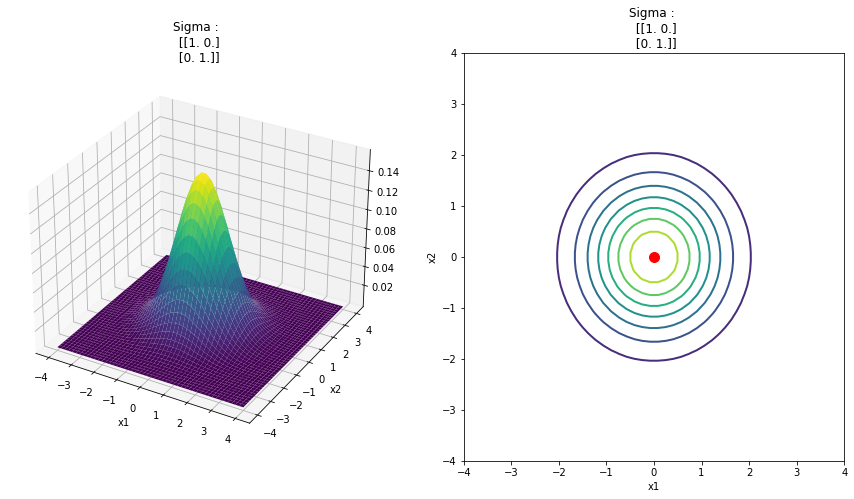

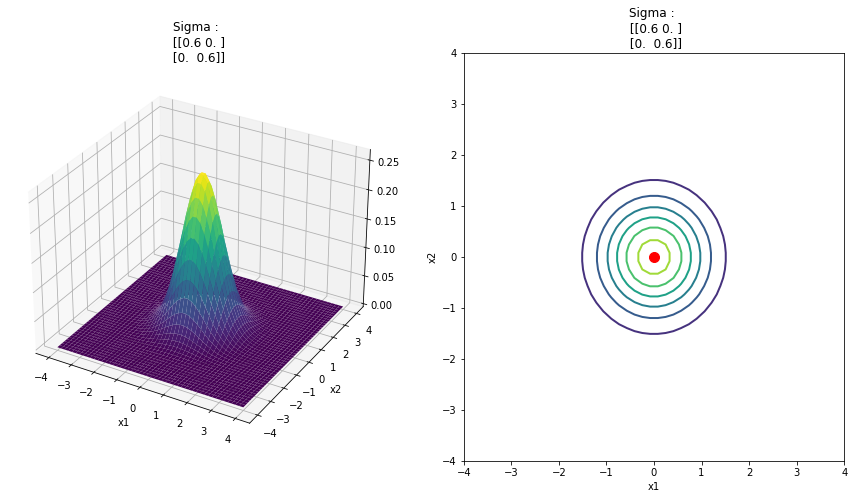

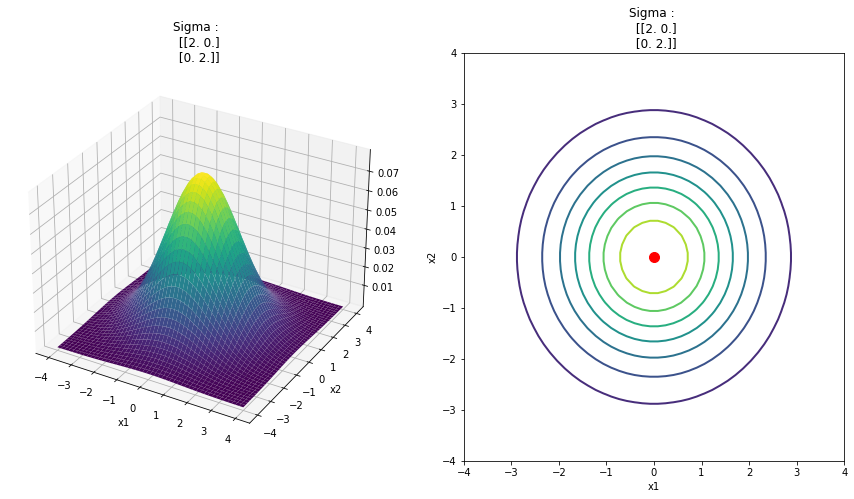

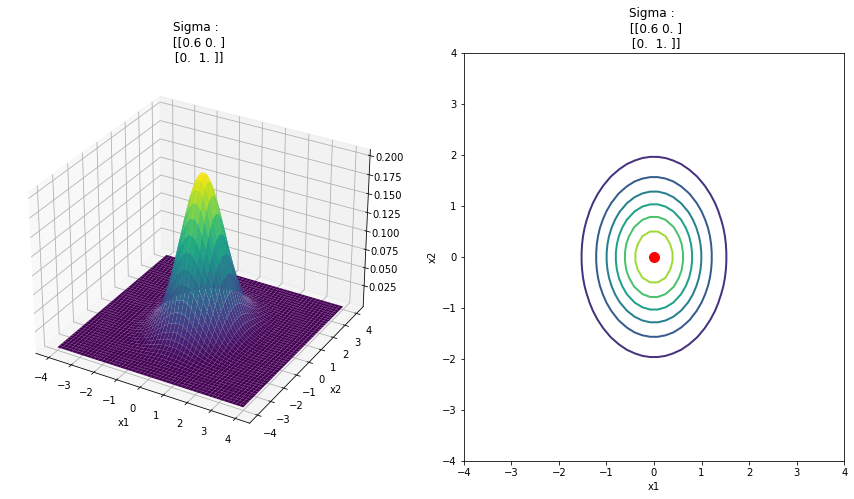

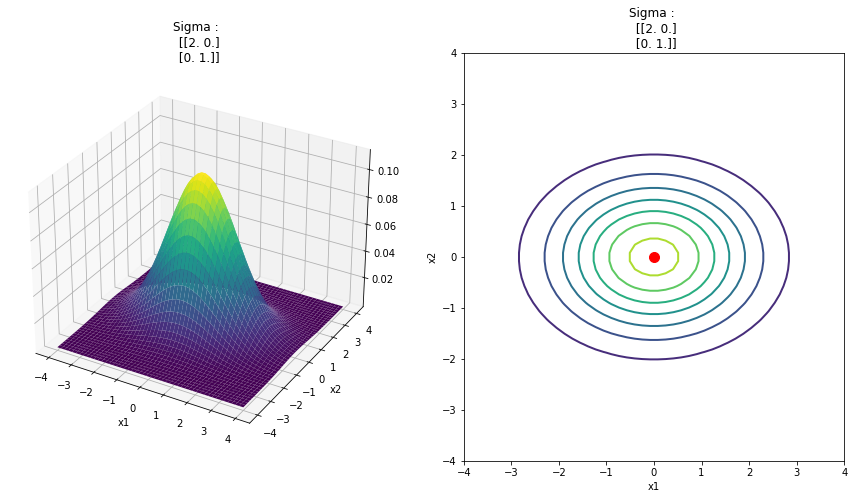

In [7]:
u = np.array([[0], [0]], dtype=float)
Sigma = np.array([[1,0], [0,1]], dtype=float)
Sigmas = [Sigma, 0.6 * Sigma, 2 * Sigma, np.array([[0.6,0], [0,1]], dtype=float), np.array([[2,0], [0,1]], dtype=float)]
us = [u] * len(Sigmas)

# surface plot
for k in range(len(us)):
    u = us[k]
    Sigma = Sigmas[k]
    X1 = np.linspace(-4, 4, 50)
    X2 = np.linspace(-4, 4, 50)

    P = np.zeros((X1.shape[0], X2.shape[0]))
    for i, x1 in enumerate(X1):
            for j, x2 in enumerate(X2):
                X = np.array([[x1], [x2]])
                P[i, j] = multivariate_gaussian(X, u, Sigma)
    P = P.T
    X1, X2 = np.meshgrid(X1, X2)
    fig = plt.figure(k, figsize=(15, 7.5))
    ax = fig.add_subplot(121, projection='3d')
    ax.plot_surface(X1, X2, P, cmap='viridis')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Sigma : \n {}'.format(Sigma))

     # contour plot
     # Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
    ax = plt.subplot(122)
    plt.contour(X1, X2, P, linewidths=2, cmap='viridis')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.plot(u[0], u[1], 'ro', ms=10, lw=2)
    plt.title('Sigma : \n {}'.format(Sigma))